In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/home/inderpreet/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data=pd.read_csv('./titanic.csv')

In [6]:
data.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
column_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']
data_clean=data.drop(column_to_drop,axis=1)

In [8]:
data_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [10]:
le=LabelEncoder()
data_clean["Sex"]=le.fit_transform(data_clean['Sex'])

In [11]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [12]:
data_clean=data_clean.fillna(data_clean['Age'].mean())

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
data_clean.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data_clean.iloc[4]

Survived     0.00
Pclass       3.00
Sex          1.00
Age         35.00
SibSp        0.00
Parch        0.00
Fare         8.05
Name: 4, dtype: float64

In [17]:
input_col=['Pclass','Sex','Age','SibSp','Parch','Fare']
output_col=['Survived']
x=data_clean[input_col]
y=data_clean[output_col]

print(x.shape,y.shape)

(891, 6) (891, 1)


In [39]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    
    N=float(col.shape[0])
    entr=0
    for ix in counts[1]:
        p=ix/N
        entr+=(-1.0*p*np.log2(p))
    return entr

In [40]:
def divide_data(x_data,key,keyval):
    x_left=pd.DataFrame([],columns=x_data.columns)
    x_right=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[key].iloc[ix]
        
        if val<keyval:
            x_left=x_left.append(x_data.iloc[ix])
        else:
            x_right=x_right.append(x_data.iloc[ix])
    
    return x_left,x_right

In [41]:
x_left,x_right=divide_data(data_clean,'Sex',0.5)

In [42]:
x_left.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.0,314.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,0.0,28.216730,0.694268,0.649682,44.479818
std,0.438211,0.857290,0.0,12.877543,1.156520,1.022846,57.997698
min,0.000000,1.000000,0.0,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,0.0,21.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,0.0,29.699118,0.000000,0.000000,23.000000
75%,1.000000,3.000000,0.0,35.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,0.0,63.000000,8.000000,6.000000,512.329200


In [43]:
x_right.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.0,577.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,1.0,30.505824,0.429809,0.235702,25.523893
std,0.391775,0.813580,0.0,13.009478,1.061811,0.612294,43.138263
min,0.000000,1.000000,1.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.0,29.699118,0.000000,0.000000,10.500000
75%,0.000000,3.000000,1.0,35.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,1.0,80.000000,8.000000,5.000000,512.329200


In [44]:
x_left.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
8,1.0,3.0,0.0,27.0,0.0,2.0,11.1333
9,1.0,2.0,0.0,14.0,1.0,0.0,30.0708
10,1.0,3.0,0.0,4.0,1.0,1.0,16.7000
11,1.0,1.0,0.0,58.0,0.0,0.0,26.5500
14,0.0,3.0,0.0,14.0,0.0,0.0,7.8542
15,1.0,2.0,0.0,55.0,0.0,0.0,16.0000
18,0.0,3.0,0.0,31.0,1.0,0.0,18.0000


In [45]:
x_right.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500
5,0.0,3.0,1.0,29.699118,0.0,0.0,8.4583
6,0.0,1.0,1.0,54.000000,0.0,0.0,51.8625
7,0.0,3.0,1.0,2.000000,3.0,1.0,21.0750
12,0.0,3.0,1.0,20.000000,0.0,0.0,8.0500
13,0.0,3.0,1.0,39.000000,1.0,5.0,31.2750
16,0.0,3.0,1.0,2.000000,4.0,1.0,29.1250
17,1.0,2.0,1.0,29.699118,0.0,0.0,13.0000
20,0.0,2.0,1.0,35.000000,0.0,0.0,26.0000


In [48]:
def information_gain(x_data,key,keyval):
    left,right=divide_data(x_data,key,keyval)
    
    l=float(left.shape[0]/x_data.shape[0])
    r=float(right.shape[0]/x_data.shape[0])
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000
    return entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))

In [49]:
for fx in x.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


In [52]:
class Person:
    def __init__(self,name):
        self.name=name
    def say_hello(self):
        print("Hello how are you",self.name)
    

p=Person("Amay")
p.say_hello()

Hello how are you Amay


In [56]:
def my_func():
    print("I am inside this function")


if __name__=="__main__":
    my_func()


I am inside this function


In [71]:
class DecisionTree:
    
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.key=None
        self.keyval=None
        self.depth=depth
        self.max_depth=max_depth
        self.ans=None
        
    def train(self,X_train):
        print(self.depth,"=========>")
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        
        inf_gain=[]
        
        for ix in features:
            inf_gain.append(information_gain(X_train,ix,data_clean[ix].mean()))
            
        self.key=features[np.argmax(inf_gain)]
        self.keyval=X_train[self.key].mean()
        
        data_left,data_right=divide_data(X_train,self.key,self.keyval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean()>0.5:
                self.ans="Survive"
            else:
                self.ans="Dead"
            return
        
        if self.depth>=self.max_depth:
            if X_train.Survived.mean()>0.5:
                self.ans="Survive"
            else:
                self.ans="Dead"
            return
        
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        if X_train.Survived.mean()>0.5:
            self.ans="Survive"
        else:
            self.ans="Dead"
        return
    
    def predict(self,test):
        if test[self.key]>self.keyval:
            if self.right==None:
                return self.ans
            return self.right.predict(test)
        
        if self.left==None:
            return self.ans
        return self.left.predict(test)
            

In [72]:
split=int(0.80*data_clean.shape[0])

train_data=data_clean[:split]
val_data=data_clean[split:]

In [73]:
dt=DecisionTree()


In [74]:
dt.train(train_data)

0 =========>
1 =========>
2 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
2 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
1 =========>
2 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
2 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>
3 =========>
4 =========>
5 =========>
5 =========>
4 =========>
5 =========>
5 =========>


In [78]:
y_pred=[]
for ix in range(val_data.shape[0]):
    y_pred.append(dt.predict(val_data.iloc[ix]))

In [80]:
y_pred[:10]

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead']

In [81]:
print(dt.key,dt.keyval)

Sex 0.6404494382022472


In [82]:
print(dt.left.key,dt.left.keyval)
print(dt.right.key,dt.right.keyval)

Pclass 2.1875
Pclass 2.366228070175439


In [84]:
print(dt.left.left.key,dt.left.left.keyval)
print(dt.left.right.key,dt.left.right.keyval)

Fare 68.23490740740742
Fare 15.505064462809916


In [85]:
print(dt.right.left.key,dt.right.left.keyval)
print(dt.right.right.key,dt.right.right.keyval)

Parch 0.2620320855614973
Age 27.635441723157662


In [91]:
le=LabelEncoder()
y_pred=le.fit_transform(y_pred).reshape(-1,1)

In [92]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [93]:
y_actual=val_data[output_col]
print(y_actual.shape,y_pred.shape)


(179, 1) (179, 1)


In [95]:
x=np.sum(y_actual==y_pred)
x

Survived    148
dtype: int64

In [94]:
accuracy=np.sum(y_actual==y_pred)/y_pred.shape[0]

Survived    0.826816
dtype: float64

In [96]:
from sklearn import tree

/home/inderpreet/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/inderpreet/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/inderpreet/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [97]:
X=[[0,1],[1,1]]
y=[0,1]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

In [98]:
clf.predict([[2,2]])

array([1])

In [100]:
from sklearn.datasets import load_iris

In [101]:
from sklearn import tree
x,y=load_iris(return_X_y=True)
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x,y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

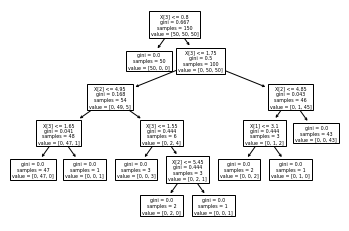

In [102]:
tree.plot_tree(clf)